In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('precision',4)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20,.5f}'.format)
plt.style.use('seaborn')

# 7.8.1 Polynomial regression and step functions

In [2]:
wage=pd.read_csv('/Users/appler/Desktop/ISLR/Wage.csv', index_col=0)

In [3]:
#把第2-9列的变量改为类别型变量
wage.iloc[:,2:10]=wage.iloc[:,2:10].apply(pd.Categorical)

In [4]:
wage.iloc[2:10].head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.87506,130.98218
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04139,154.68529
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.31806,75.04315
376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.84510,127.11574
450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.13302,169.52854


In [5]:
from sklearn.preprocessing import PolynomialFeatures

pol=PolynomialFeatures(degree=5,interaction_only=False, include_bias=False)
polf=pol.fit_transform(wage.loc[:,'age'].values.reshape(-1,1))

wage['age_2']=polf[:,1]
wage['age_3']=polf[:,2]
wage['age_4']=polf[:,3]
wage['age_5']=polf[:,4]

# 创建类别型变量wage_250
wage['wage_250']=(wage.wage > 250).map({True:1, False:0})
X = wage.loc[:,['age','age_2','age_3','age_4']]
y = wage.wage

In [41]:
wage.head()

,year,age,sex,maritl,race,education,...,wage,age_2,age_3,age_4,age_5,wage_250
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,...,75.04315,324.00000,"5,832.00000","104,976.00000","1,889,568.00000",0
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,...,70.47602,576.00000,"13,824.00000","331,776.00000","7,962,624.00000",0
161300,2003,45,1. Male,2. Married,1. White,3. Some College,...,130.98218,"2,025.00000","91,125.00000","4,100,625.00000","184,528,125.00000",0
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,...,154.68529,"1,849.00000","79,507.00000","3,418,801.00000","147,008,443.00000",0
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,...,75.04315,"2,500.00000","125,000.00000","6,250,000.00000","312,500,000.00000",0


In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(-184.1541797741471,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

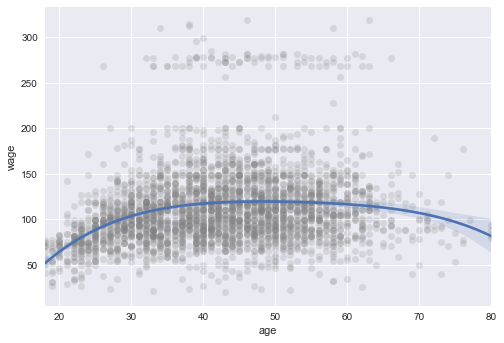

In [7]:
sns.regplot(x='age',y='wage',data=wage, order=4, scatter_kws={'alpha': 0.2,'color':'gray','facecolor':None})

In [51]:
#ANOVA
import statsmodels.api as sm 
from statsmodels.formula.api import ols
lin_reg_sm = ols(formula = 'wage ~ age + age_2 + age_3 + age_4 + age_5', data = wage).fit()
anova_sm = sm.stats.anova_lm(lin_reg_sm, typ = 2)
anova_sm

,sum_sq,df,F,PR(>F)
age,62.81674,1.00000,0.03943,0.84262
age_2,132.09072,1.00000,0.08290,0.77342
age_3,531.30763,1.00000,0.33346,0.56367
age_4,925.23465,1.00000,0.58071,0.44610
age_5,"1,282.56301",1.00000,0.80498,0.36968
Residual,"4,770,321.68581","2,994.00000",nan,nan


In [9]:
#预测分类变量
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X,wage.wage_250)
log_reg.intercept_, log_reg.coef_

(array([-5.6498833e-05]),
 array([[-1.12834464e-03, -1.60767948e-02,  5.10936165e-04,
         -4.28422975e-06]]))

In [10]:
from statsmodels.formula.api import glm
lr_sm = glm(formula='wage_250~age+age_2+age_3+age_4',data=wage,
           family=sm.families.Binomial(sm.families.links.logit)).fit()

<ipython-input-10-e9797987ccbe>:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  family=sm.families.Binomial(sm.families.links.logit)).fit()


In [11]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Tue, 22 Sep 2020   Deviance:                       701.22
Time:                        11:48:35   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age            8.9950      4.187      2.148      0.032       0.789      17.201
age_2         -0.2816      0.135     -2.081      0.037      -0.547      -0.016
age_3          0.0039      0.002      2.022      0.043       0.000       0.008
age_4      -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
==============================================================================
"""

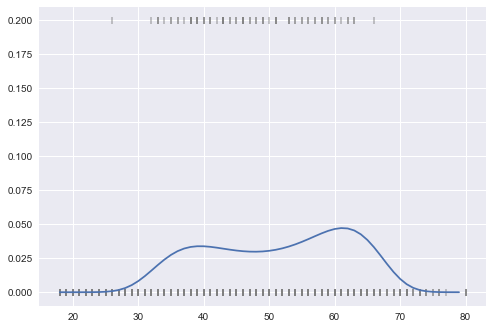

In [12]:
age_grid = np.arange(wage.age.min(),wage.age.max()).reshape(-1,1)
X_test = pd.DataFrame(PolynomialFeatures(4,include_bias=True).fit_transform(age_grid),
                     columns=['Intercept','age','age_2','age_3','age_4'])
log_reg_pred = lr_sm.predict(X_test)

plt.scatter(wage.age, wage.wage_250/5,marker='|',color='gray',alpha=0.5)
plt.plot(age_grid,log_reg_pred)

In [13]:
age_step, bins = pd.cut(wage.age, 4, retbins = True, right = True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [14]:
wage_step = pd.concat([wage.age,age_step,wage.wage,wage.wage_250],
                   keys=['age','age_step','wage','wage_250'],axis=1)

X = pd.get_dummies(wage_step.age_step)
X = X.drop(X.columns[0],axis=1)
y = wage_step.wage

lr_step = LinearRegression(fit_intercept=True)

lr_step.fit(X,y)
lr_step.intercept_, lr_step.coef_

(94.15839203351902, array([24.05349138, 23.664559  ,  7.6405917 ]))

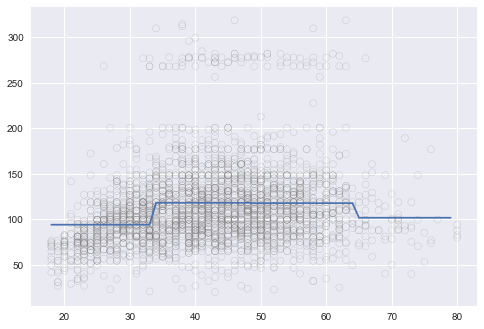

In [15]:
age_grid_bins = np.digitize(age_grid.ravel(),bins)
X_test = pd.get_dummies(age_grid_bins).drop(1,axis=1)
lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age,wage.wage,marker = 'o',color='gray',alpha=0.5,facecolor='None')
plt.plot(age_grid,lin_pred)

<ipython-input-16-40a799399d85>:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  family=sm.families.Binomial(sm.families.links.logit)).fit()


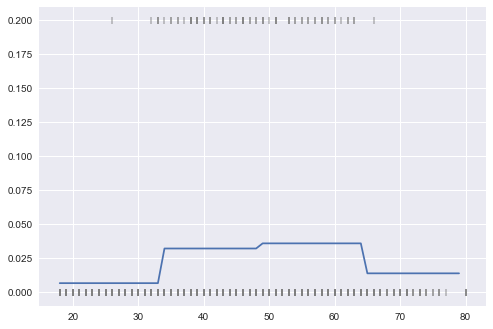

In [16]:
from statsmodels.api import GLM
lr_sm = GLM(wage_step.wage_250, sm.add_constant(X),
           family=sm.families.Binomial(sm.families.links.logit)).fit()
log_pred=lr_sm.predict(sm.add_constant(X_test))
plt.scatter(wage_step.age, wage_step.wage_250/5, marker='|',color='gray', alpha=0.5)
plt.plot(age_grid,log_pred)

# 7.8.2 Splines

cubic spline with specific knots

In [19]:
from patsy import dmatrix
#定义三个节点，25，40，60
age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)',
                    data=wage,
                    return_type='dataframe')

In [25]:
age_grid_spline1 = dmatrix('bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)',
                    {'age_grid':age_grid},
                    return_type='dataframe')

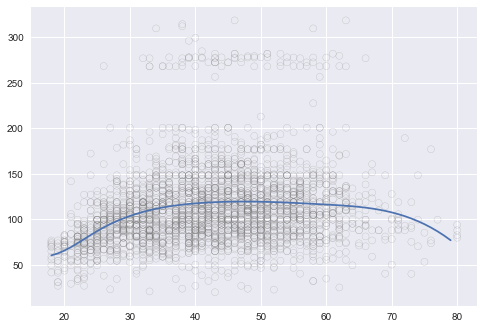

In [27]:
spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1,wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

plt.scatter(wage.age,wage.wage,marker = 'o',color = 'gray',alpha = 0.5, facecolor = 'None')
plt.plot(age_grid,spline_pred1)

#cublic spline with specified degrees of freedom

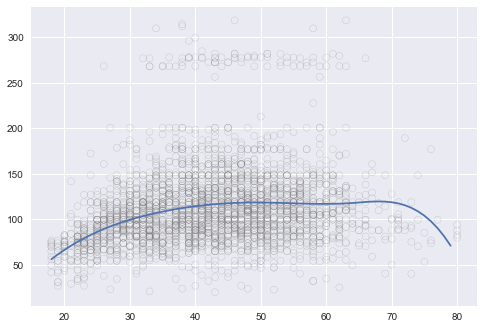

In [32]:
age_spline2=dmatrix('bs(age,df=6,include_intercept=False)',
                    data=wage,
                    return_type='dataframe')
age_grid_spline2=dmatrix('bs(age_grid,df=6,include_intercept=False)',
                    {'age_grid':age_grid},
                    return_type='dataframe')
spline_reg2=LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2,wage.wage)

spline_pred2=spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age,wage.wage,marker='o',color='gray',alpha=0.5,facecolor='None')
plt.plot(age_grid,spline_pred2)

#Natural Spline

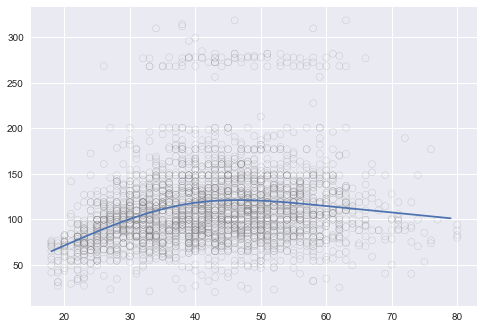

In [34]:
age_spline3 = dmatrix('cr(age, df=4)',
                    data=wage,
                    return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age_grid, df=4)',
                    {'age_grid':age_grid},
                    return_type='dataframe')

spline_reg3=LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3,wage.wage)

spline_pred3=spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age,wage.wage,marker='o',color='gray',alpha=0.5,facecolor='None')
plt.plot(age_grid,spline_pred3)

# 7.8.3 GAMs

In [38]:
year_sql = dmatrix('cr(age, df=4)',
                    data=wage,
                    return_type='dataframe').drop('Intercept',axis=1)

age_sql = dmatrix('cr(age, df=5)',
                    data=wage,
                    return_type='dataframe').drop('Intercept',axis=1)

edu_gam =pd.get_dummies(wage.education).iloc[:,1:]

wage_gam=pd.concat([wage.wage, year_sql, age_sql, edu_gam],axis=1)

X = wage_gam.iloc[:,1:14]
y = wage_gam.wage

gam=LinearRegression(fit_intercept=True)
gam.fit(X,y)

gam.intercept_, gam.coef_

(47.88247214968777,
 array([-244.53082173,  244.64453777,  211.26359289, -211.37730893,
         247.11129013, -126.68629155, -249.7214329 ,  -94.91763235,
         224.21406667,   11.0997486 ,   23.53364504,   38.31027306,
          62.72735655]))